In [4]:
# import python libraries

import pandas as pd 
import matplotlib.pyplot as plt # visualizing data

# Netflix Data Analysis 

## 1. Dataset Overview

In [5]:
#import csv file
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape
df.info()
df.columns

<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   str  
 1   type          8807 non-null   str  
 2   title         8807 non-null   str  
 3   director      6173 non-null   str  
 4   cast          7982 non-null   str  
 5   country       7976 non-null   str  
 6   date_added    8797 non-null   str  
 7   release_year  8807 non-null   int64
 8   rating        8803 non-null   str  
 9   duration      8804 non-null   str  
 10  listed_in     8807 non-null   str  
 11  description   8807 non-null   str  
dtypes: int64(1), str(11)
memory usage: 825.8 KB


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='str')

In [4]:
#check for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
movies_df = df[df['type'] == 'Movie']

In [11]:
movies_df['duration_min'] = (movies_df['duration'].str.replace('min', '' , regex=False).astype(float))

In [12]:
movies_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_min'],
      dtype='str')

In [13]:
movies_df[['duration','duration_min']].head()

,duration,duration_min
0,90 min,90.0
6,91 min,91.0
7,125 min,125.0
9,104 min,104.0
12,127 min,127.0


In [14]:
movies_df['duration_min'].mean()

np.float64(99.57718668407311)

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [23]:
movies_df.groupby('year_added')['duration_min'].mean().tail()

year_added
2017.0     95.680191
2018.0    101.739693
2019.0     99.923455
2020.0    101.585670
2021.0    102.839879
Name: duration_min, dtype: float64

In [24]:
avg_duration_by_year = (movies_df.groupby('year_added')['duration_min'].mean()) 
avg_duration_by_year.tail()

year_added
2017.0     95.680191
2018.0    101.739693
2019.0     99.923455
2020.0    101.585670
2021.0    102.839879
Name: duration_min, dtype: float64

## 3. Exploratory Data Analysis 

### 3.1 Average Movie Duration Over Years 

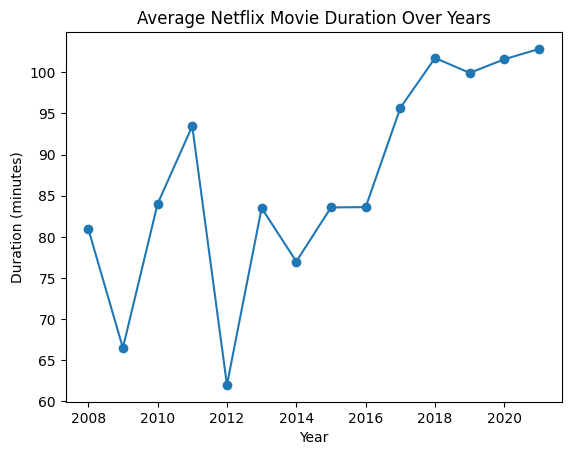

In [30]:
movies_df.groupby('year_added') ['duration_min'].mean().plot(marker='o') 
plt.title("Average Netflix Movie Duration Over Years")
plt.xlabel("Year")
plt.ylabel("Duration (minutes)")
plt.show()

**Observation:**
The average duration of Netflix movies has shown a gradual increase over the years, indicating a shift towards longer movie formats.

In [9]:
trend_df = df.groupby(['year_added' , 'type'] ).size().unstack()
trend_df.tail()


type,Movie,TV Show
year_added,,
2017.0,839.0,325.0
2018.0,1237.0,388.0
2019.0,1424.0,575.0
2020.0,1284.0,594.0
2021.0,993.0,505.0


### 3.2 Movies vs TV Shows Trend 

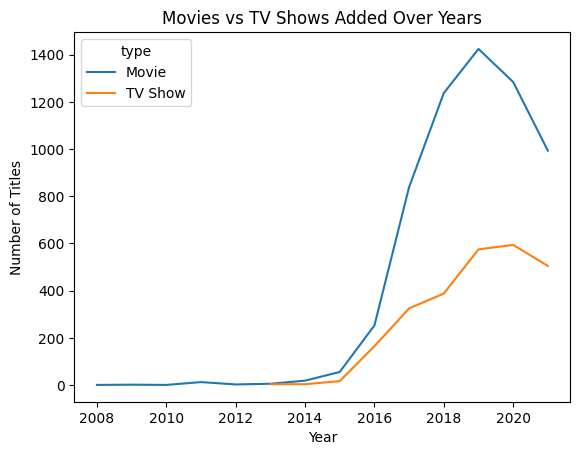

In [11]:
trend_df.plot()
plt.title("Movies vs TV Shows Added Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

**Observation:**
TV shows have increased faster than movies in recent years . 
This reflects Netflix's focus on user retention through episodic content. 

## Coclusion

The analysis reveals Netflix's growing focus on TV shows and gradual increase in movie durations, suggesting a strategic shift towards content 
that drives higher user engagement.